## Displays a set of calibrated exposures in a mosaic, so we can view 1 square degree

For this notebook you need a large container, otherwise it will produce a broken pipe.

<b>Please use the current release of the Stack.<b>

In [5]:
import warnings
import matplotlib.pyplot as plt

from lsst.afw.display import Mosaic
from lsst.daf.butler import Butler
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
#import lsst.sphgeom
#import lsst.afw.display as afwDisplay
#import lsst.geom as geom
#from lsst.geom import SpherePoint, Angle
import gc

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

## Call the Butler for DP0.2

In [6]:
# For DC2 gen3, these are the only options

butler = Butler('dp02', collections='2.2i/runs/DP0.2')
registry = butler.registry

## How many images do you want to display? What chip do you want to start the display on?

In [7]:
x = 21
chip_start = 79
display_in = 'firefly'

## Use the Butler to call calexps for 10 different detectors.

<Figure size 2000x2000 with 0 Axes>

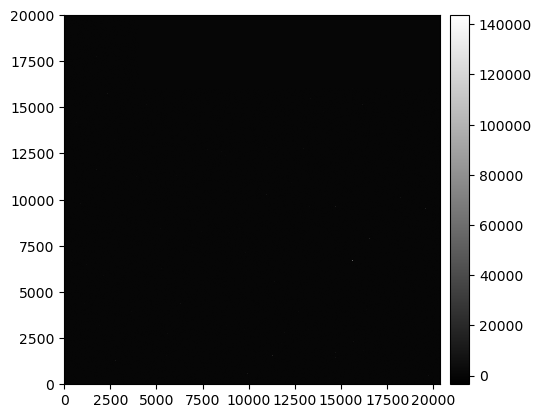

In [8]:
fig = plt.figure(figsize=(20,20))  
m = Mosaic()
m.setGutter(5)
m.setBackground(10)
m.setMode("square")  

labels=[]  #This makes sure the labels and images lists start empty
images= []

for i in range(0,x):
    name = "im"+str(i)
    namer = "im"+str(i)+".image"
    labels.append("Detector "+str(79+i))
    datad = "dataId"+str(i)
    datad = {'visit': 1185205, 'detector': chip_start + i, 'band': 'r'}
    vars()[name] = butler.get('calexp', **datad)
    images.append(namer)

images2 = [eval(string) for string in images] #This converts the list of strings to a list of string literals

mosaic = m.makeMosaic(images2) #This creates the mosaic


if display_in == 'firefly':
    afwDisplay.setDefaultBackend('firefly') #This opens it in firefly. Uncomment below if you want it in matplotlib.
    display = afwDisplay.Display(frame=1)

else:
    afwDisplay.setDefaultBackend('matplotlib')
    display = afwDisplay.Display(frame=fig)

display.scale('asinh', 'zscale')
display.mtv(mosaic)
m.drawLabels(labels, display)